In [69]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4647 - accuracy: 0.8712
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1094 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0703 - accuracy: 0.9785


In [70]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0908 - accuracy: 0.9707
0.09082349389791489 0.9707000255584717


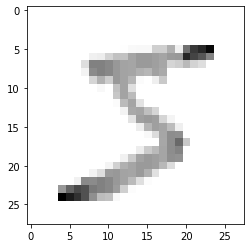

In [83]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [124]:
model.save('epic_num_reader.model')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [126]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [127]:
# predictions = new_model.predict(x_test)
predictions = model.predict(x_test)

In [128]:
print(predictions)

[[9.23918986e-09 4.18965300e-07 4.89352203e-07 ... 9.99995708e-01
  1.50313284e-09 7.68526206e-07]
 [2.48405740e-08 8.51290184e-04 9.99119699e-01 ... 5.23978372e-09
  3.32933155e-06 4.97745711e-09]
 [1.43770089e-08 9.99781430e-01 1.68123624e-05 ... 1.84141245e-05
  3.35627519e-05 5.13758152e-07]
 ...
 [2.09358753e-08 4.03010972e-07 6.83225423e-08 ... 2.79945089e-05
  7.72535714e-06 6.51719165e-05]
 [1.11953250e-06 2.34094983e-07 1.18914365e-07 ... 2.60712625e-07
  2.49567296e-04 1.97126604e-09]
 [4.05023826e-07 3.15823137e-08 3.56697956e-06 ... 4.24365543e-10
  3.83082295e-08 2.39468334e-10]]


In [3]:
import numpy as np

print(np.argmax(predictions[6]))

ModuleNotFoundError: No module named 'numpy'

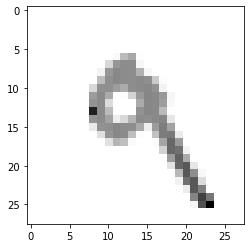

In [142]:
plt.imshow(x_test[7], cmap=plt.cm.binary)
plt.show()